# Datahack 2021 Starter Code

This is the starter code for Datahack 2021. This code will help set you up. This notebook will contain basic data preprocessing, visualizations, and general best practices to help you get started exploring your data. Additionally, we will look at preprocessing some of the data as well.

## Exploratory Data Analysis (EDA)

Below we have included some libraries that you may find helpful for data exploration as well as a way for you to pull the data from the S3 bucket where it's being hosted. **We want to pop the Unnamed: 0 column. It represents the row number and is irrelevant as a feature.**

In [111]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# for this demo we just keep one-third of the data
data = pd.read_csv("https://datahack2020dataset.s3.us-east-2.amazonaws.com/OfficialCompetitionDataset.csv")
data = data.sample(n=int(1/3*len(data)))
data.pop('Unnamed: 0')

print(f'data dimensions: {data.shape}')

data dimensions: (8834, 25)


### Viewing Headers

The first step in data exploration is to determine what the features represent as well as their type (continuous, categorical, etc.). The code below changes Pandas settings so that dataframes display all their columns (instead of omitting middle columns with ellipses) and displays the names of the columns with their data type.

In [112]:
pd.set_option('display.max_columns', None)
data.head()

name                 album  \
14850  The Caterpillar (Bestival Live 2011)    Bestival Live 2011   
20643                      When All Is Dead          Strange Land   
11961                            Miles Away           1,000 Years   
1087                          Furnace skies    Toward the Low Sun   
9996        Embodiment of This Bitter Chaos  Blood for the Master   

                  artist  auditory  beats_per_measure  beats_per_min  \
14850           the cure  0.474000                4.0        125.047   
20643     yellow ostrich  1.908000                5.0        173.827   
11961  corin tucker band  2.760000                4.0         97.375   
1087         dirty three  2.403000                4.0         87.366   
9996           goatwhore  0.000068                4.0        164.828   

       concert_probability          critic  critic_rating  danceability  \
14850                 97.1       ian cohen           58.0      1.831252   
20643                 10.9   paul thompson           68.0      1.203218   
11961                 10.0   rebecca raber           65.0      1.551155   
1087                  14.3   stuart berman           68.0      1.205627   
9996                  21.3  grayson currin           48.0      1.481418   

       hotness      hype  instrumentalness  length_minutes  lyricism  \
14850      4.8  0.633397          0.056271          236251       7.0   
20643      2.0  0.385942         -0.841951          291817       7.0   
11961      0.4  0.168054         -0.836566          274173       1.0   
1087       1.4  0.655964          0.453595          283867       6.0   
9996       2.8  0.689641          1.147552          284200       9.0   

      major/minor  nplays  positivity  \
14850       major  967523    0.304569   
20643       minor  137268   -0.049681   
11961       major   10489   -0.983967   
1087        minor  110553   -0.812681   
9996        major   75290   -1.378703   

                                                  review reviewer_type  \
14850  The Cure are nearly three-and-a-half decades d...   contributor   
20643  Even when he's surrounded, solitude seems to s...   contributor   
11961  Sleater-Kinney went on indefinite hiatus in 20...           NaN   
1087   Seven years is long enough for people to forge...   contributor   
9996   If you take the time to read the script of Blo...   contributor   

       song_debut styles tone    volume      vulgar  
14850  2011-12-05   rock    D  0.833948  NOT VULGAR  
20643  2013-10-08   rock    E  0.756795  NOT VULGAR  
11961  2010-10-05   rock    A  0.729875  NOT VULGAR  
1087   2012-02-28   rock    C  0.850717  NOT VULGAR  
9996   2012-02-14  metal    F  0.843223  NOT VULGAR

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8834 entries, 14850 to 17677
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 8834 non-null   object 
 1   album                8834 non-null   object 
 2   artist               8834 non-null   object 
 3   auditory             8834 non-null   float64
 4   beats_per_measure    8834 non-null   float64
 5   beats_per_min        8834 non-null   float64
 6   concert_probability  8834 non-null   float64
 7   critic               8834 non-null   object 
 8   critic_rating        8834 non-null   float64
 9   danceability         8834 non-null   float64
 10  hotness              8834 non-null   float64
 11  hype                 8834 non-null   float64
 12  instrumentalness     8834 non-null   float64
 13  length_minutes       8834 non-null   int64  
 14  lyricism             8834 non-null   float64
 15  major/minor          8834 non-nul

### Dealing with Missing Data

As the above output shows, some data rows have null values for some of the features. We see the number of rows missing each feature below.

In [114]:
data.isnull().sum()

name                      0
album                     0
artist                    0
auditory                  0
beats_per_measure         0
beats_per_min             0
concert_probability       0
critic                    0
critic_rating             0
danceability              0
hotness                   0
hype                      0
instrumentalness          0
length_minutes            0
lyricism                  0
major/minor               0
nplays                    0
positivity                0
review                    0
reviewer_type          2005
song_debut                0
styles                  563
tone                      0
volume                    0
vulgar                    0
dtype: int64

The column with the most missing data is reviewer_type. Since it's a categorical value, we plot the distribution of its values and fill the missing rows with the majority class.

<AxesSubplot:title={'center':'Bar chart of classes'}, xlabel='reviewer_type', ylabel='Count'>

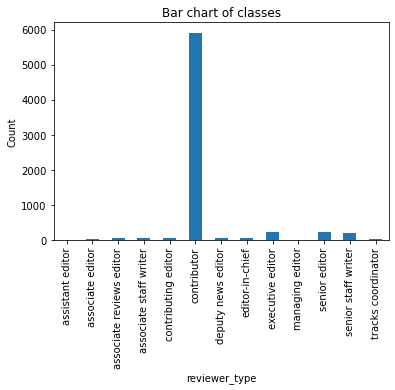

In [115]:
groups = data.groupby('reviewer_type')
plt.ylabel("Count")
plt.title("Bar chart of classes")
groups.size().plot.bar()

The value "contributor" appears by far the most often, so we replace None values with it. 

In [116]:
data["reviewer_type"].fillna("contributor", inplace=True) 

In [117]:
data.isnull().sum()

name                     0
album                    0
artist                   0
auditory                 0
beats_per_measure        0
beats_per_min            0
concert_probability      0
critic                   0
critic_rating            0
danceability             0
hotness                  0
hype                     0
instrumentalness         0
length_minutes           0
lyricism                 0
major/minor              0
nplays                   0
positivity               0
review                   0
reviewer_type            0
song_debut               0
styles                 563
tone                     0
volume                   0
vulgar                   0
dtype: int64

We see that some styles are missing as well. The following are some different ideas for dealing with the missing rows:
* Just remove rows that are missing. 
* Drop the style column so you don't have to remove any rows.
* One more involved idea would be to train a classifier on the data containing the feature and using the trained model to predict missing values.

For demo purposes we just remove rows missing style.

In [118]:
data.dropna(subset = ["styles"], inplace=True)
data.isnull().sum()

name                   0
album                  0
artist                 0
auditory               0
beats_per_measure      0
beats_per_min          0
concert_probability    0
critic                 0
critic_rating          0
danceability           0
hotness                0
hype                   0
instrumentalness       0
length_minutes         0
lyricism               0
major/minor            0
nplays                 0
positivity             0
review                 0
reviewer_type          0
song_debut             0
styles                 0
tone                   0
volume                 0
vulgar                 0
dtype: int64

### Visualizations

Boxplots are useful for outlier detection. Here we can see that there are a few outliers in the "hotness" of hit songs. This makes sense as most songs are not well-known and only a small number become very popular.

<AxesSubplot:>

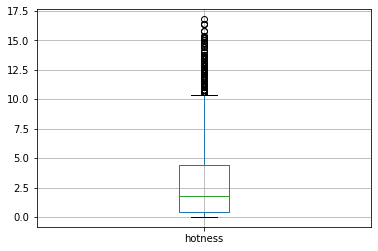

In [119]:
data.boxplot(["hotness"])

Here we can see that most songs are not really that popular. As we expect, the relationship is heavily skewed.

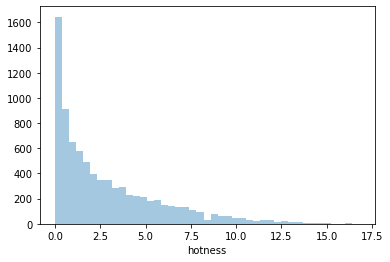

In [120]:
sns.distplot(data['hotness'], kde=False)
plt.show()

Here we can observe the correlations in our data. We see that some variables such and loudness and energy are highly correlated. This information can be used to remove redundant features to reduce overfitting when building a model.

<AxesSubplot:>

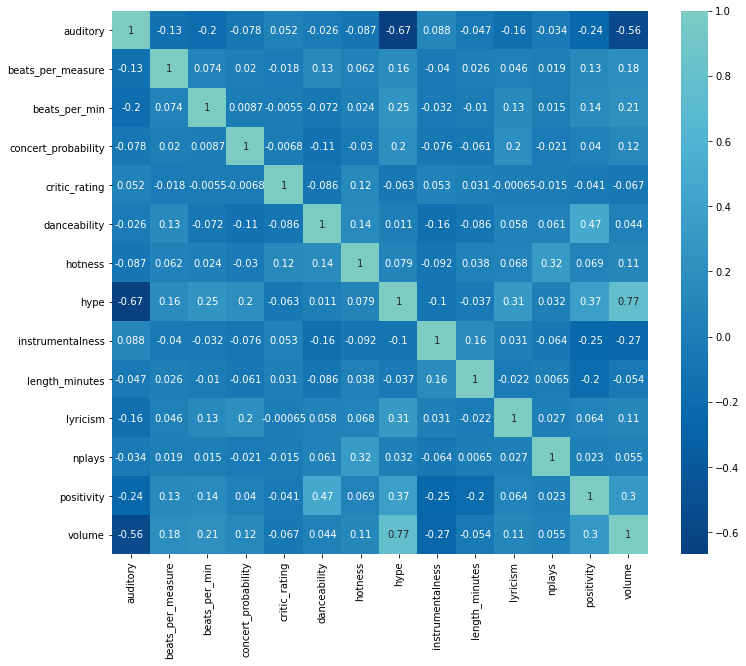

In [121]:
correlations = data.corr()
fig = plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='GnBu_r', center=1)

Here we have a pairwise plots, which plot the relationship between every pair of features in the data. These may reveal some interesting relationships between features that you could include in your data analysis.

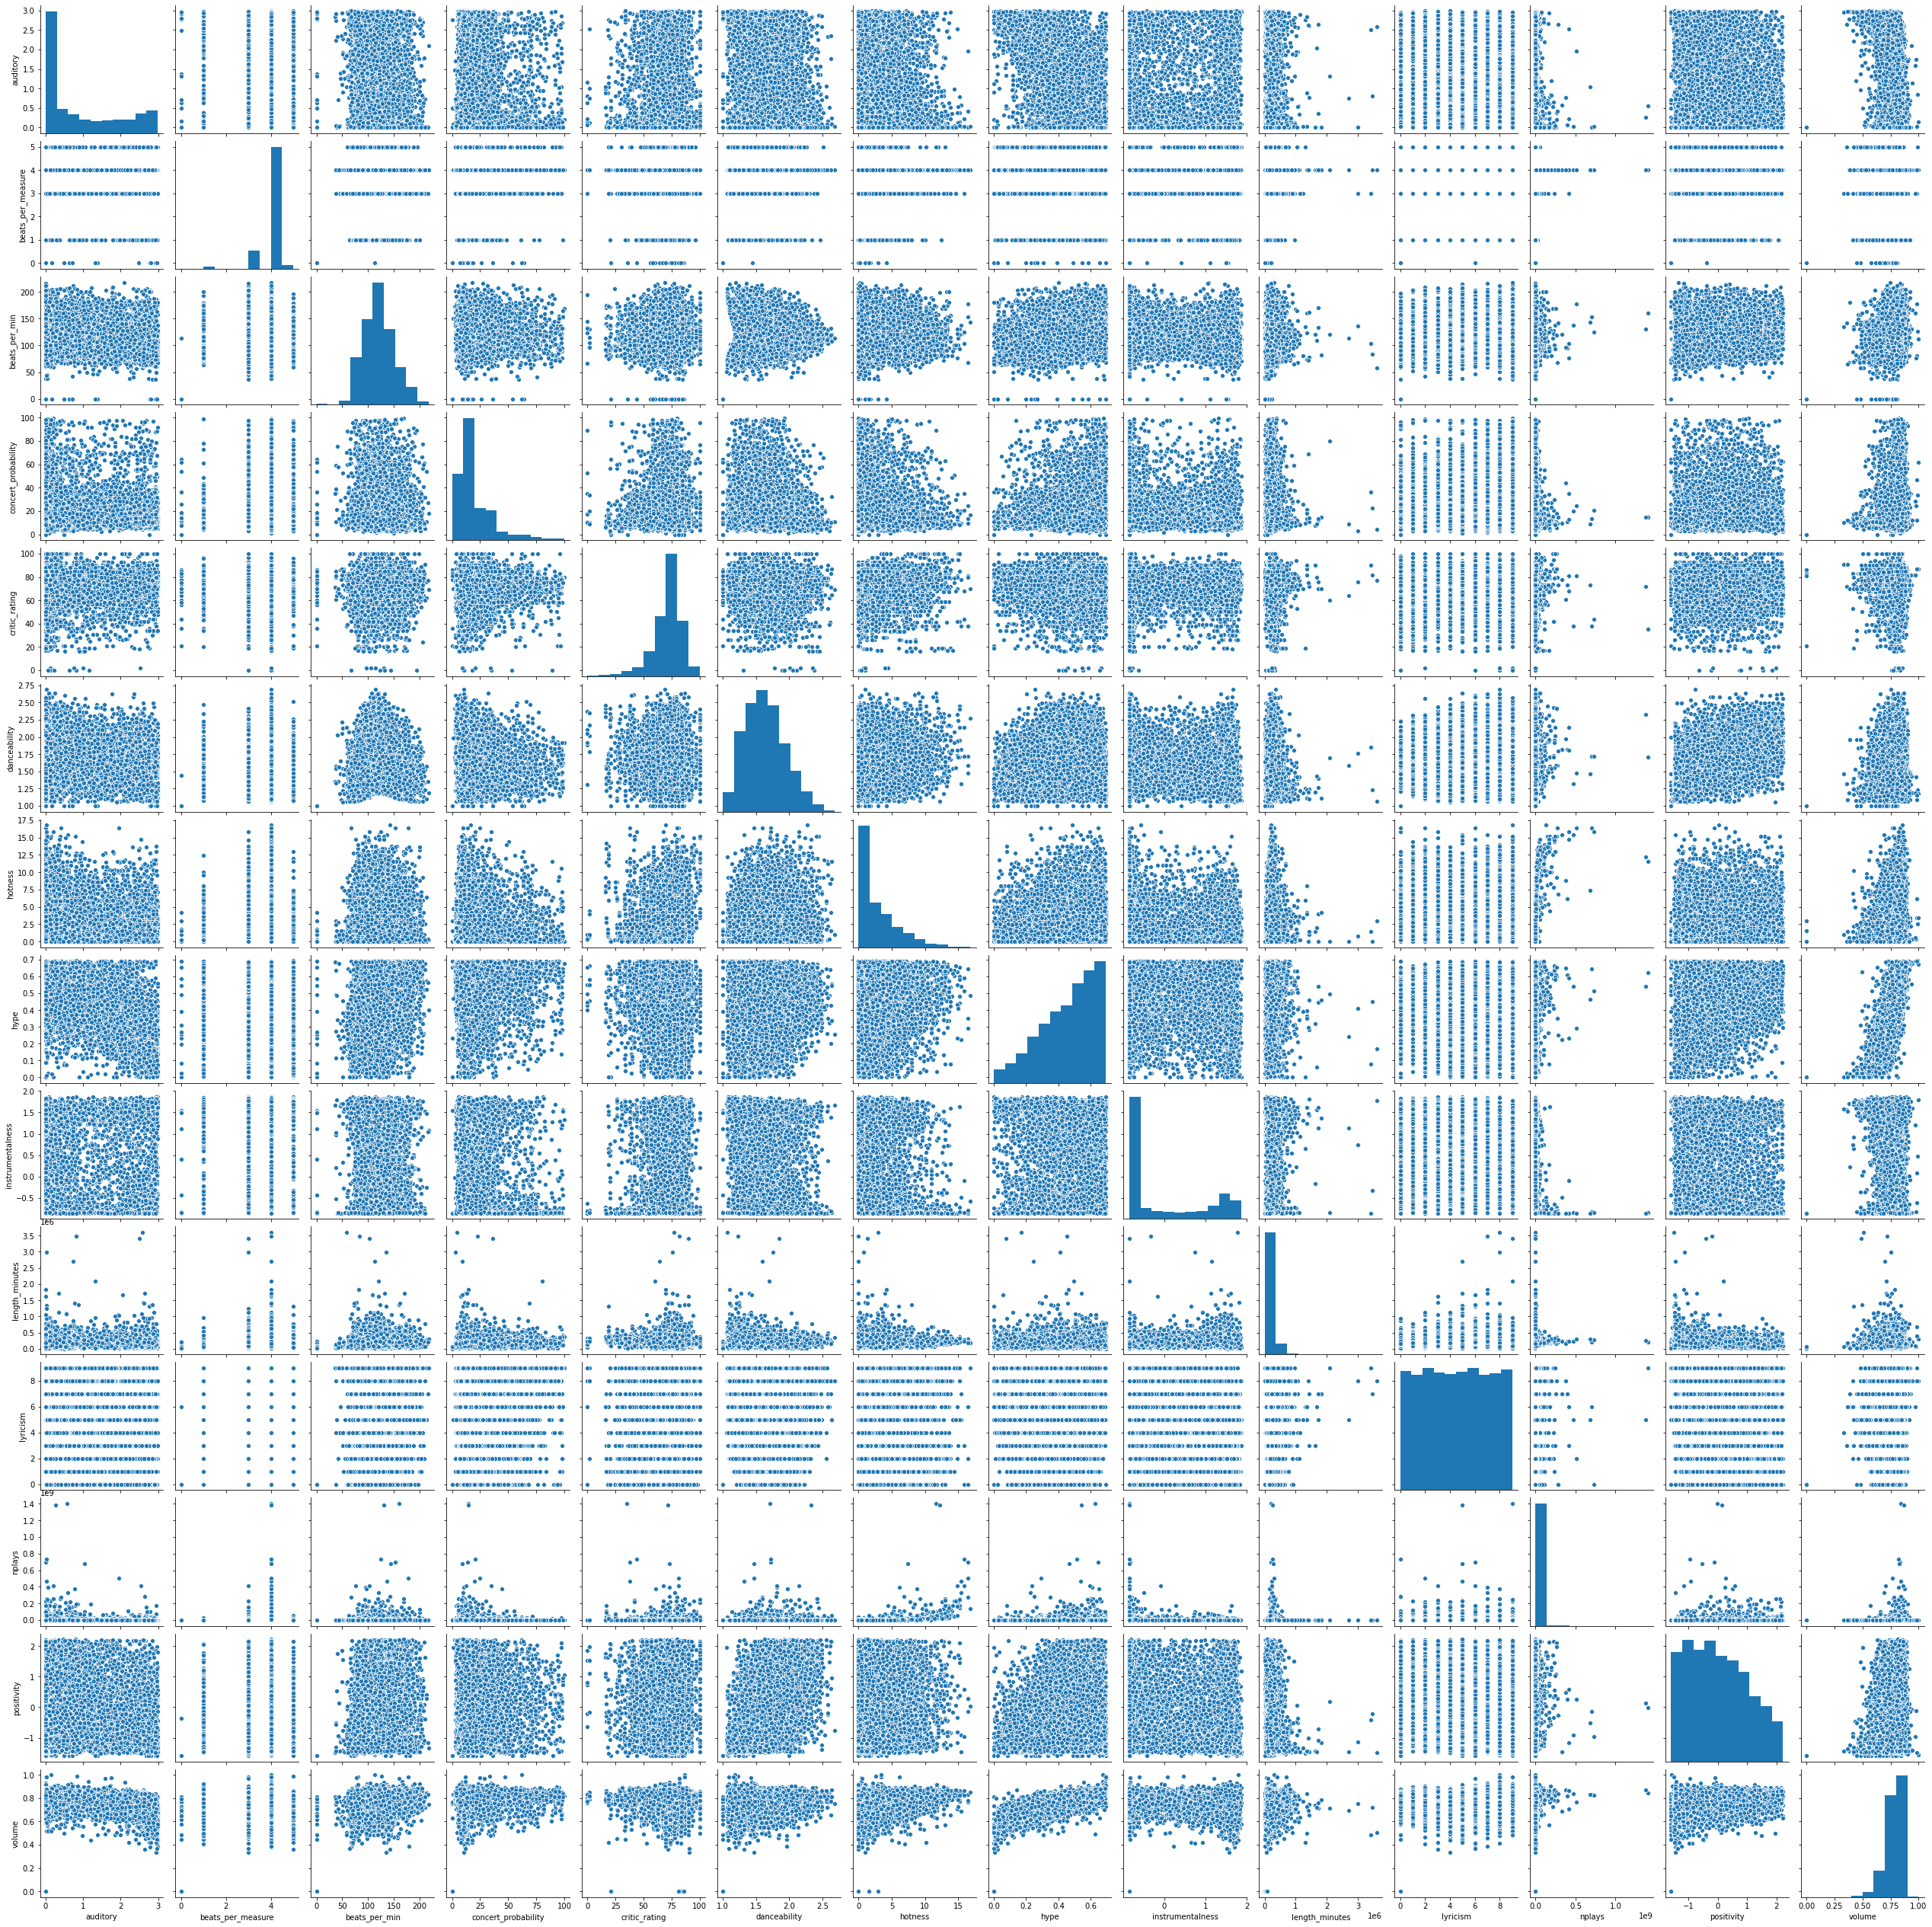

In [122]:
sns.pairplot(data)

### Text Features

We do not delve into text preprocessing much in this demo, but 'review' is the only long-form text feature provided in the dataset. There are a number of ways in which numerical features can be constructed from text, such as n-grams and part-of-speech-based count/binary vectors. 

## Building a Simple Model

We now show how to build a simple model for tone classification. Trying to classify the key of a song isn't a wortwhile prediction task, but we pursue it for demonstration's sake. It's up to you to come up with something more useful!

Our first step is to normalize all numerical variables to lie in the interval [0,1]. Feature normalization improves the performance of some machine-learning algorithms, especially distance-based ones like k-nearest neighbors. In any case, it's good practice.

In [123]:
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                 'critic_rating', 'danceability', 'hotness', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume']

for col in numerical_cols:
    data[col] = (data[col]-data[col].min()) / (data[col].max() - data[col].min()) 

For demo purposes we get rid of most categorical variables.

In [124]:
ignore_cols = ['name', 'album', 'artist', 'critic', 'review', 'reviewer_type', 'song_debut', 'styles']
for col in ignore_cols:
    data.pop(col)

The only remaining categorical variables are 'major/minor' and 'vulgar'. We convert these features into numerical binary ones.

In [125]:
categorical_cols = ['major/minor', 'vulgar']
data = pd.get_dummies(data, columns=categorical_cols)

Our final step is to remove the tone column and use it as our target vector in the training process.

In [126]:
y = data.pop('tone')

In [127]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y = LE.fit_transform(y)

We now train a logistic regression classifier on the data. We first make an 80-20 train-test split, then train on the train split, and finally evaluate our model on the test split.

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [129]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.1619335347432024


/home/ashwin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


As expected, the model does an awful (though better than random) job of classifying the tone of songs, since the key to which a song is set probably has little to do with the features given to the model. However, the rudimentary code we have provided here can easily be modified to create new classifiers with more advanced feature engineering.